In [50]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:

def acf_pacf(ts, lags):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(ts, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(ts, lags=lags, ax=ax2)

In [55]:
df = pd.read_csv('data/all_data.csv')

In [56]:
df.shape

(49833, 26)

In [57]:
df = df[(df.year > 2009) & (df.year < 2015)]
df = df[['zipcode', 'zhvi', 'date', 'year', 'month', 'dropoff', 'pickup', 'n_issued', 'MRP_1Br']]


In [58]:
mean_df = df.groupby(['date']).mean()

In [59]:
mean_df.head()

,zipcode,zhvi,year,month,dropoff,pickup,n_issued,MRP_1Br
date,,,,,,,,
2010-01-15,10805.173913,475130.841121,2010,1,554.696203,584.280000,3.258993,NaN
2010-02-15,10801.759563,472342.592593,2010,2,423.121795,449.027211,2.445378,NaN
2010-03-15,10802.081967,473784.684685,2010,3,483.350318,495.986928,3.548148,NaN
2010-04-15,10805.173913,474068.468468,2010,4,573.885350,585.064935,3.097015,2900
2010-05-15,10802.081967,474895.495495,2010,5,583.165605,606.337748,3.080645,3300


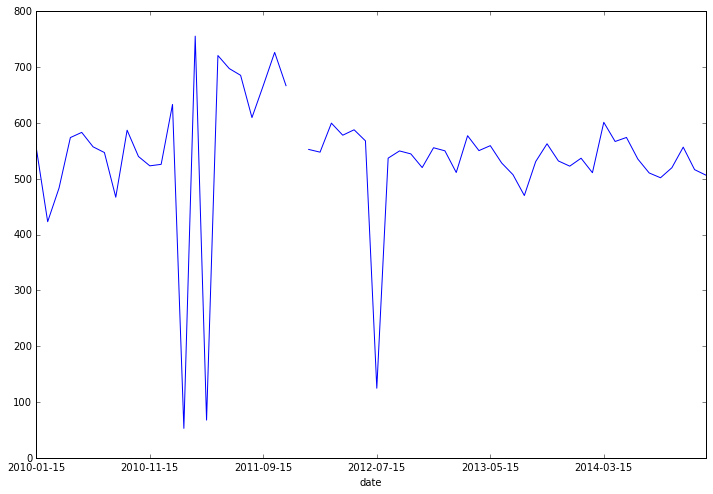

In [60]:
ts = pd.Series(mean_df['dropoff'])
ts.plot(figsize=(12,8))

In [61]:
ts[pd.isnull(ts)] = 570

In [62]:
ts[ts < 300]

date
2011-02-15     52.758865
2011-04-15     67.557143
2012-07-15    124.684211
Name: dropoff, dtype: float64

In [65]:
ts['2011-02-15'] = 650
ts['2011-04-15'] = 710
ts['2012-07-15'] = 550

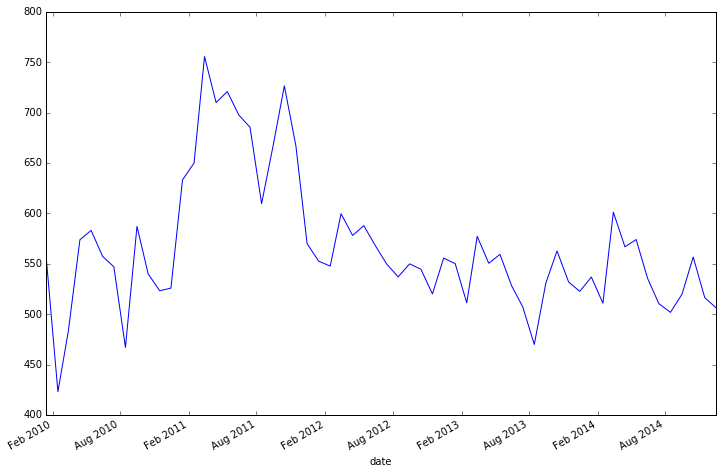

In [79]:
ts = pd.Series(mean_df['dropoff'])
ts.index = pd.to_datetime(ts.index)
ts.plot(figsize=(12,8))

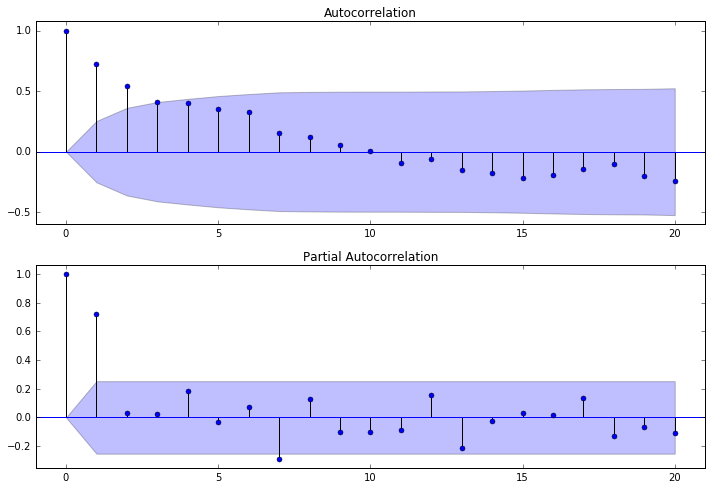

In [80]:
acf_pacf(ts, 20)

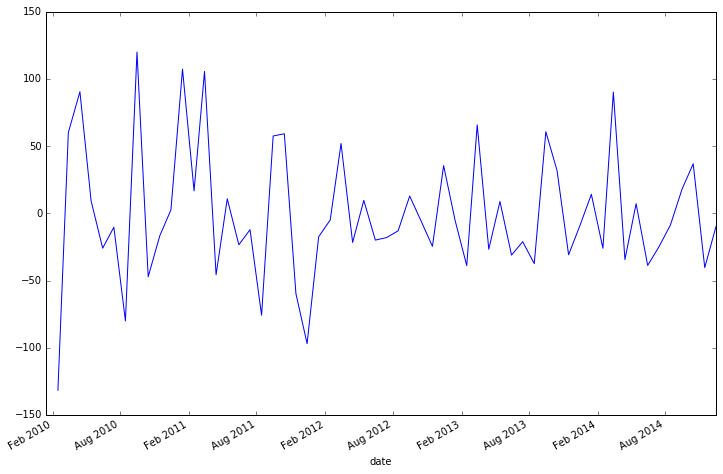

In [81]:
ts_diff=ts.diff(1)
ts_diff.plot(figsize=(12,8))

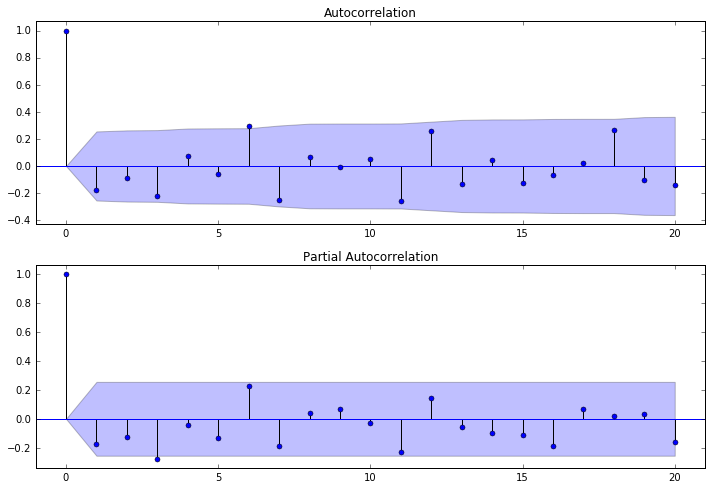

In [82]:
acf_pacf(ts_diff[1:],20)

In [83]:
model=sm.tsa.ARIMA(ts, order=(3,1,0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.dropoff   No. Observations:                   59
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -309.511
Method:                       css-mle   S.D. of innovations             45.784
Date:                Thu, 23 Jun 2016   AIC                            629.022
Time:                        11:58:21   BIC                            639.409
Sample:                    02-15-2010   HQIC                           633.076
                         - 12-15-2014                                         
===================================================================================
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              -0.3005      3.514     -0.085      0.932        -7.189     6.588
ar.L1.D.dropoff    -0.2275      0.130     -1.751      0.085        -0.482     0.027
ar.L2.D.dropoff    -0.1897      0.133     -1.424      0.160        -0.451     0.071
ar.L3.D.dropoff    -0.3078      0.135     -2.275      0.027        -0.573    -0.043
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4550           -1.3861j            1.4589           -0.1995
AR.2            0.4550           +1.3861j            1.4589            0.1995
AR.3           -1.5265           -0.0000j            1.5265           -0.5000
-----------------------------------------------------------------------------
"""

In [84]:

acf_pacf(pd.Series(model.resid().flatten(),index=ts.index), 20)

TypeError: 'Series' object is not callable